In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
n_rows = 10000
n_dim = 2
n_epochs = 500
np.random.seed(2)

In [3]:
k = np.random.uniform(-10, 10, n_dim)
p = np.random.randint(1, 4, n_dim)
k, p

(array([-1.28010196, -9.48147536]), array([3, 3]))

In [4]:
df = pd.DataFrame(columns=['x' + str(i) for i in range(1, n_dim + 1)] + ['y'], index = range(n_rows))
for i in range(n_rows):
    df.iloc[i, :-1] = np.random.uniform(-10, 10, n_dim)
    f = lambda x: sum((k[i] * x[i] ** p[i] for i in range(len(x))))
    df.at[i, 'y'] = f(df.iloc[i, :-1])
for col in df.columns:
    df[col] = df[col].astype('float32')
df

,x1,x2,y
0,-0.305018,-3.589271,438.460785
1,-6.911467,3.977254,-173.896149
2,-7.600989,-0.296482,562.400574
3,2.654755,6.364534,-2468.370850
4,3.660520,-0.028777,-62.787228
...,...,...,...
9995,-6.221625,-0.947085,316.342133
9996,-4.216709,-4.925946,1229.276367
9997,-1.049610,-8.648188,6134.173828
9998,1.158512,4.211849,-710.416321


<IPython.core.display.Javascript object>


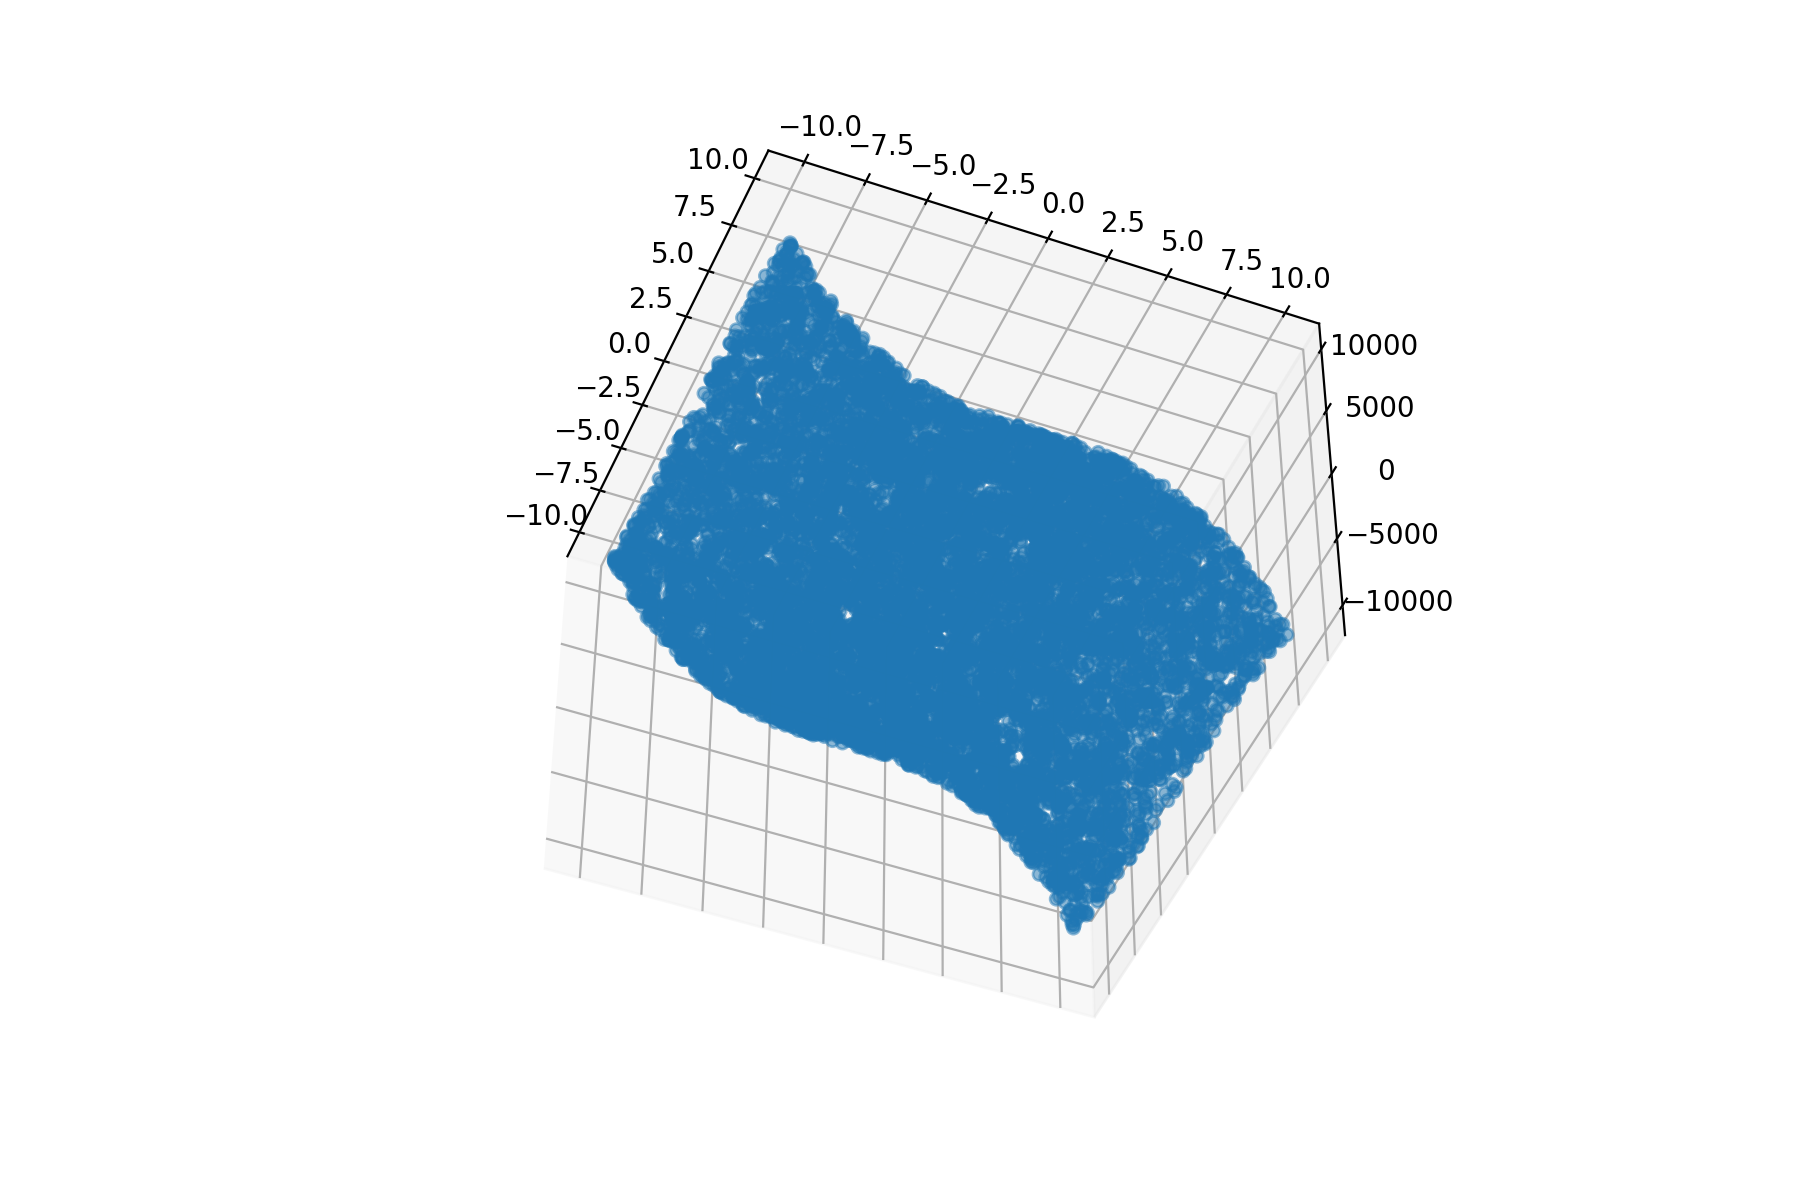

In [5]:
if n_dim == 2:
    ax = plt.figure(figsize=(9, 6)).add_subplot(projection='3d')
    ax.scatter(df['x1'], df['x2'], df['y'], alpha=0.5)
    plt.show()

In [6]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]], 
                                                    df[df.columns[-1]],
                                                    test_size=0.5,
                                                    random_state=57)

In [7]:
model = Sequential([
    Dense(25, input_dim=n_dim, activation="relu"),
    Dense(100, activation="relu"),
    Dense(100, activation="relu"),
    Dense(10, activation="relu"),
    Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                75        
                                                                 
 dense_1 (Dense)             (None, 100)               2600      
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 13,796
Trainable params: 13,796
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=n_epochs)

Epoch 1/500
  1/157 [..............................] - ETA: 22s - loss: 9698290.0000

2023-12-26 15:49:32.241688: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


157/157 [==============================] - 0s 1ms/step - loss: 10491991.0000 - val_loss: 5058354.0000
Epoch 2/500
157/157 [==============================] - 0s 739us/step - loss: 2554756.7500 - val_loss: 2136831.0000
Epoch 3/500
157/157 [==============================] - 0s 758us/step - loss: 1956812.0000 - val_loss: 1890710.7500
Epoch 4/500
157/157 [==============================] - 0s 735us/step - loss: 1756411.1250 - val_loss: 1734364.3750
Epoch 5/500
157/157 [==============================] - 0s 744us/step - loss: 1587991.0000 - val_loss: 1576965.3750
Epoch 6/500
157/157 [==============================] - 0s 746us/step - loss: 1427401.5000 - val_loss: 1408293.6250
Epoch 7/500
157/157 [==============================] - 0s 748us/step - loss: 1287946.2500 - val_loss: 1266539.7500
Epoch 8/500
157/157 [==============================] - 0s 754us/step - loss: 1157333.7500 - val_loss: 1125433.5000
Epoch 9/500
157/157 [==============================] - 0s 751us/step - loss: 1018957.4375 - v

157/157 [==============================] - 0s 746us/step - loss: 1686.0664 - val_loss: 1916.4106
Epoch 75/500
157/157 [==============================] - 0s 748us/step - loss: 2393.4536 - val_loss: 1999.7002
Epoch 76/500
157/157 [==============================] - 0s 788us/step - loss: 1679.2594 - val_loss: 2078.4619
Epoch 77/500
157/157 [==============================] - 0s 776us/step - loss: 2363.2900 - val_loss: 1367.9331
Epoch 78/500
157/157 [==============================] - 0s 781us/step - loss: 1981.2102 - val_loss: 2575.4546
Epoch 79/500
157/157 [==============================] - 0s 765us/step - loss: 2303.1890 - val_loss: 1415.2784
Epoch 80/500
157/157 [==============================] - 0s 743us/step - loss: 1377.0862 - val_loss: 1784.9070
Epoch 81/500
157/157 [==============================] - 0s 750us/step - loss: 1574.5023 - val_loss: 2679.0088
Epoch 82/500
157/157 [==============================] - 0s 753us/step - loss: 1445.8730 - val_loss: 1261.8464
Epoch 83/500
157/157 [=

157/157 [==============================] - 0s 717us/step - loss: 1034.2122 - val_loss: 729.5175
Epoch 149/500
157/157 [==============================] - 0s 733us/step - loss: 2153.5381 - val_loss: 2256.2815
Epoch 150/500
157/157 [==============================] - 0s 753us/step - loss: 869.4413 - val_loss: 763.4135
Epoch 151/500
157/157 [==============================] - 0s 726us/step - loss: 803.4324 - val_loss: 842.3416
Epoch 152/500
157/157 [==============================] - 0s 753us/step - loss: 830.2195 - val_loss: 794.4098
Epoch 153/500
157/157 [==============================] - 0s 763us/step - loss: 907.3078 - val_loss: 631.9455
Epoch 154/500
157/157 [==============================] - 0s 713us/step - loss: 695.0389 - val_loss: 647.5991
Epoch 155/500
157/157 [==============================] - 0s 720us/step - loss: 927.3911 - val_loss: 856.5316
Epoch 156/500
157/157 [==============================] - 0s 724us/step - loss: 1175.1306 - val_loss: 3032.0933
Epoch 157/500
157/157 [=====

Epoch 223/500
157/157 [==============================] - 0s 790us/step - loss: 971.4886 - val_loss: 799.9566
Epoch 224/500
157/157 [==============================] - 0s 841us/step - loss: 534.7266 - val_loss: 434.0191
Epoch 225/500
157/157 [==============================] - 0s 809us/step - loss: 689.2046 - val_loss: 763.6155
Epoch 226/500
157/157 [==============================] - 0s 722us/step - loss: 750.5821 - val_loss: 491.6532
Epoch 227/500
157/157 [==============================] - 0s 696us/step - loss: 624.8165 - val_loss: 1478.3020
Epoch 228/500
157/157 [==============================] - 0s 767us/step - loss: 1293.3943 - val_loss: 984.8045
Epoch 229/500
157/157 [==============================] - 0s 775us/step - loss: 1247.8477 - val_loss: 613.2800
Epoch 230/500
157/157 [==============================] - 0s 728us/step - loss: 552.0958 - val_loss: 1375.6145
Epoch 231/500
157/157 [==============================] - 0s 738us/step - loss: 658.3785 - val_loss: 1479.5288
Epoch 232/500


Epoch 298/500
157/157 [==============================] - 0s 758us/step - loss: 967.4444 - val_loss: 1833.5906
Epoch 299/500
157/157 [==============================] - 0s 983us/step - loss: 914.4532 - val_loss: 729.4222
Epoch 300/500
157/157 [==============================] - 0s 1ms/step - loss: 737.2228 - val_loss: 4686.9346
Epoch 301/500
157/157 [==============================] - 0s 781us/step - loss: 1421.4423 - val_loss: 566.9485
Epoch 302/500
157/157 [==============================] - 0s 803us/step - loss: 393.3279 - val_loss: 857.6667
Epoch 303/500
157/157 [==============================] - 0s 784us/step - loss: 1318.3823 - val_loss: 1479.6962
Epoch 304/500
157/157 [==============================] - 0s 766us/step - loss: 1339.6021 - val_loss: 2930.7048
Epoch 305/500
157/157 [==============================] - 0s 732us/step - loss: 2136.7737 - val_loss: 741.5861
Epoch 306/500
157/157 [==============================] - 0s 727us/step - loss: 678.0919 - val_loss: 474.4291
Epoch 307/500

Epoch 373/500
157/157 [==============================] - 0s 769us/step - loss: 838.4387 - val_loss: 390.4856
Epoch 374/500
157/157 [==============================] - 0s 737us/step - loss: 369.7521 - val_loss: 389.5575
Epoch 375/500
157/157 [==============================] - 0s 741us/step - loss: 378.1613 - val_loss: 530.4807
Epoch 376/500
157/157 [==============================] - 0s 748us/step - loss: 362.8701 - val_loss: 455.9347
Epoch 377/500
157/157 [==============================] - 0s 732us/step - loss: 401.1823 - val_loss: 436.8988
Epoch 378/500
157/157 [==============================] - 0s 729us/step - loss: 564.4323 - val_loss: 1390.3315
Epoch 379/500
157/157 [==============================] - 0s 729us/step - loss: 857.8740 - val_loss: 958.5014
Epoch 380/500
157/157 [==============================] - 0s 766us/step - loss: 447.9411 - val_loss: 316.5282
Epoch 381/500
157/157 [==============================] - 0s 906us/step - loss: 608.4734 - val_loss: 696.1071
Epoch 382/500
157/

Epoch 448/500
157/157 [==============================] - 0s 717us/step - loss: 1213.6174 - val_loss: 2439.4224
Epoch 449/500
157/157 [==============================] - 0s 723us/step - loss: 595.7670 - val_loss: 273.9287
Epoch 450/500
157/157 [==============================] - 0s 726us/step - loss: 915.5668 - val_loss: 889.6469
Epoch 451/500
157/157 [==============================] - 0s 728us/step - loss: 635.4609 - val_loss: 325.3311
Epoch 452/500
157/157 [==============================] - 0s 724us/step - loss: 490.0143 - val_loss: 294.0598
Epoch 453/500
157/157 [==============================] - 0s 729us/step - loss: 270.7206 - val_loss: 479.9271
Epoch 454/500
157/157 [==============================] - 0s 723us/step - loss: 514.4620 - val_loss: 1208.6915
Epoch 455/500
157/157 [==============================] - 0s 729us/step - loss: 714.7025 - val_loss: 389.0328
Epoch 456/500
157/157 [==============================] - 0s 725us/step - loss: 376.4384 - val_loss: 598.7275
Epoch 457/500
15

<IPython.core.display.Javascript object>


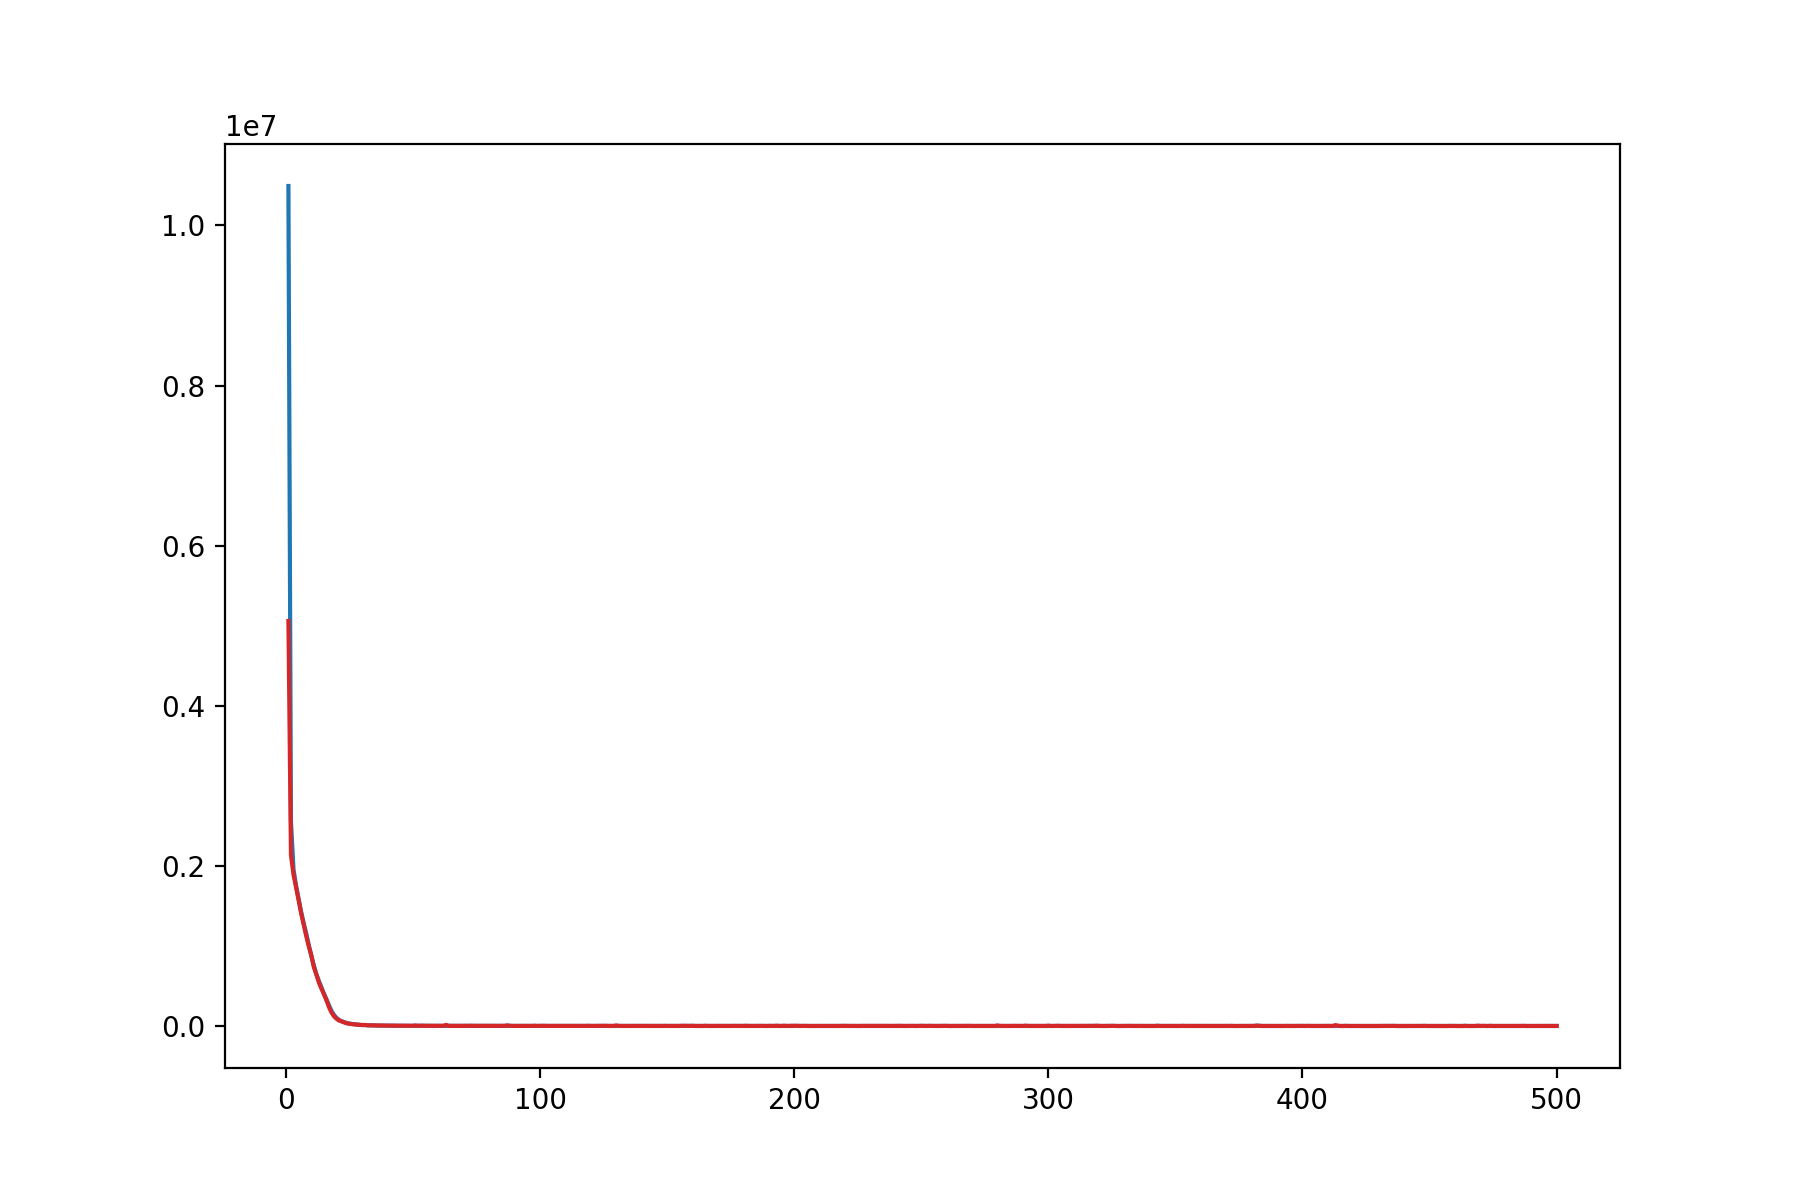

In [9]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(range(1, n_epochs + 1), history.history["loss"], c="tab:blue")
ax.plot(range(1, n_epochs + 1), history.history["val_loss"], c="tab:red")
plt.show()